## Introduction

Upon initial assessment, I identified the absence of certain values in the stock data, necessitating the need for a strategic approach to address this issue. Consequently, I applied interpolation techniques to fill in the gaps in the dataset, ensuring a more complete and robust analysis.

To enhance the visualization aspect, I employed the Plotly Express library for time series analysis. The interactive features of Plotly Express facilitate a dynamic exploration of the data from various perspectives, eliminating the need for extensive additional code.

The analytical framework is strategically divided into two primary segments: prices and returns. This division is critical in financial analyses, as it recognizes the potential challenges of relying solely on price analysis. By incorporating both price and return analyses, a more comprehensive and nuanced understanding of the market dynamics is achieved, preventing the risk of encountering misleading conclusions.

# 0. Imports

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import shapiro
from scipy.stats import norm
import statsmodels.api as sm

# 1. Data Acquisition and Preparation

In [ ]:
# Date converter
date_parse = lambda x: pd.to_datetime(x, format='%Y/%m/%d', errors='coerce')

In [ ]:
# Load the data
file_path = '/content/Dataset_InternshipProject.xlsx'  # Replace with your file path
prices = pd.read_excel(file_path, parse_dates=['Date'], date_parser=date_parse )
prices.set_index('Date', inplace=True)

In [ ]:
# cria o dataframe de retornos
returns=prices.pct_change()

# 2. Análise Exploratória de Dados


## 2.1 Prices

In [ ]:
# View the first rows of the DataFrame
prices.head()

Feeder Cattle  Live Cattle    Corn  Wheat Chicago  Brent Crude  \
Date                                                                         
2023-12-05        214.300      168.625  490.25         620.75        77.31   
2023-12-04        210.525      167.075  485.50         595.75        78.03   
2023-12-01        214.425      169.275  484.75         577.00        78.88   
2023-11-30        219.950      170.875  482.75         570.25        82.83   
2023-11-29        222.200      171.900  475.75         556.00        83.10   

            Heating Oil  Soybean  Soybean Meal  Soybean Oil  Sugar  Coffee  \
Date                                                                         
2023-12-05       263.39  1308.50         418.5        50.26  24.96  183.75   
2023-12-04       265.97  1306.25         408.3        51.24  25.81  179.40   
2023-12-01       266.15  1325.00         412.7        51.45  25.09  184.35   
2023-11-30       275.42  1342.75         424.0        52.26  26.04  184.70   
2023-11-29       280.87  1347.00         427.0        52.64  26.86  172.70   

            Cotton  Wheat Kansas  USDBRL       Gold  
Date                                                 
2023-12-05   79.68        653.75  4.9256  2038.3000  
2023-12-04   78.68        656.25  4.9449  2042.2000  
2023-12-01   79.42        645.00  4.8828  2089.7000  
2023-11-30   80.06        643.25  4.9195  2057.2000  
2023-11-29   79.59        640.00  4.9060  2067.1001

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1295 entries, 2023-12-05 to 2018-12-06
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feeder Cattle  1260 non-null   float64
 1   Live Cattle    1260 non-null   float64
 2   Corn           1260 non-null   float64
 3   Wheat Chicago  1260 non-null   float64
 4   Brent Crude    1292 non-null   float64
 5   Heating Oil    1260 non-null   float64
 6   Soybean        1260 non-null   float64
 7   Soybean Meal   1260 non-null   float64
 8   Soybean Oil    1260 non-null   float64
 9   Sugar          1258 non-null   float64
 10  Coffee         1258 non-null   float64
 11  Cotton         1258 non-null   float64
 12  Wheat Kansas   1260 non-null   float64
 13  USDBRL         1252 non-null   float64
 14  Gold           1260 non-null   float64
dtypes: float64(15)
memory usage: 161.9 KB


In [ ]:
prices.isnull().sum()

Feeder Cattle    35
Live Cattle      35
Corn             35
Wheat Chicago    35
Brent Crude       3
Heating Oil      35
Soybean          35
Soybean Meal     35
Soybean Oil      35
Sugar            37
Coffee           37
Cotton           37
Wheat Kansas     35
USDBRL           43
Gold             35
dtype: int64

In [ ]:
# Interpolate missing data
prices=prices.interpolate(method='polynomial', order=3)

In [ ]:
# Descriptive statistics
prices_summary_stats = prices.describe()
prices_correlation_matrix = prices.corr()

In [ ]:
prices_summary_stats

Feeder Cattle  Live Cattle         Corn  Wheat Chicago  Brent Crude  \
count    1295.000000  1295.000000  1295.000000    1295.000000  1295.000000   
mean      162.675332   131.080966   512.961532     658.292603    71.619051   
std        33.463581    24.534835   134.708437     162.476504    20.458863   
min       108.250000    83.825000   307.750000     424.750000    19.330000   
25%       139.812500   111.612500   380.750000     526.750000    60.175000   
50%       151.685863   126.175000   510.750000     627.250000    71.450000   
75%       178.000000   145.412500   630.500000     751.250000    84.775000   
max       257.375000   187.800000   815.750000    1294.000000   127.980000   

       Heating Oil      Soybean  Soybean Meal  Soybean Oil        Sugar  \
count  1295.000000  1295.000000   1295.000000  1295.000000  1295.000000   
mean    230.624755  1225.253691    373.339044    48.795307    17.081741   
std      83.847877   276.539026     63.617058    17.081154     4.549518   
min      61.040000   802.500000    281.800000    24.990000     9.380000   
25%     182.035000   907.000000    306.900000    30.240000    12.750000   
50%     208.320000  1308.500000    385.600000    52.850000    17.380000   
75%     287.445000  1447.000000    426.400000    62.990000    19.655000   
max     457.130000  1769.000000    504.000000    86.600000    27.950000   

            Coffee       Cotton  Wheat Kansas       USDBRL         Gold  
count  1295.000000  1295.000000   1295.000000  1295.000000  1295.000000  
mean    152.643435    84.004825    668.115784     4.921356  1734.908742  
std      47.225455    20.984832    213.281859     0.588322   210.532330  
min      88.000000    48.410000    357.573105     3.646800  1241.400000  
25%     107.450000    68.400000    470.341993     4.635100  1625.050000  
50%     149.800000    81.417284    637.000000     5.116800  1794.300000  
75%     187.641135    89.497819    833.375000     5.334000  1893.900000  
max     258.350000   158.020000   1367.750000     5.887000  2089.700000

In [ ]:
# Visualizing Time Series with Plotly Express
fig = px.line(prices, y=['Feeder Cattle', 'Live Cattle', 'Corn', 'Wheat Chicago',	'Brent Crude', 'Heating Oil',	'Soybean',	'Soybean Meal',	'Soybean Oil',	'Sugar',	'Coffee',	'Cotton',	'Wheat Kansas',	'USDBRL',	'Gold'],
              labels={'value': 'Prices', 'variable': 'Assets'},
              title='Prices time series')
fig.show()

Through the time series analysis, it is evident that from 2019 to 2020, there was a substantial increase in the price of gold, which subsequently maintained a high level. This surge could be attributed to the pandemic, causing market instability, as gold is considered a low-risk asset.
A comparable pattern was noted in the soybean market, though this extended from 2019 to 2021.

# Moving Average


A moving average is a statistical calculation employed to analyze data points across a specific time span. Its purpose is to mitigate fluctuations or noise in the data, enabling a more effective identification of trends or patterns.

By averaging out short-term fluctuations in the data, moving averages play a crucial role in highlighting underlying trends or patterns. This proves especially beneficial when examining time series data.


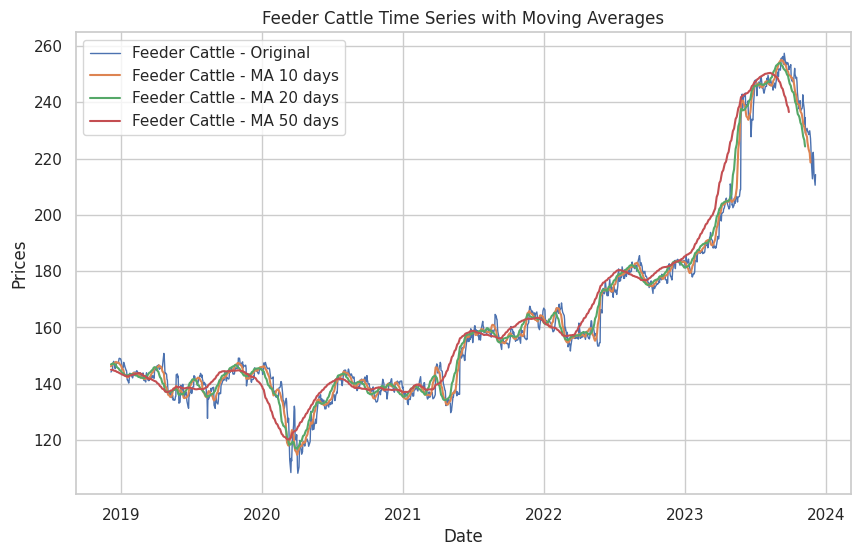

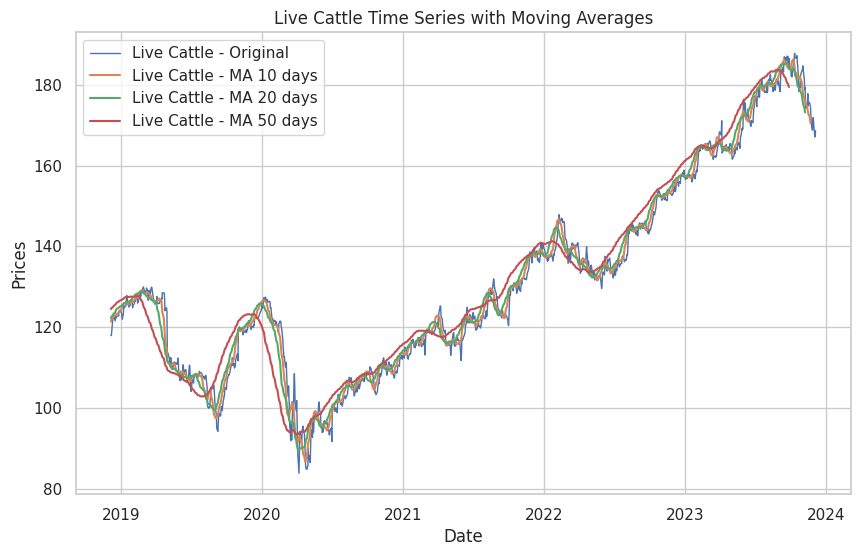

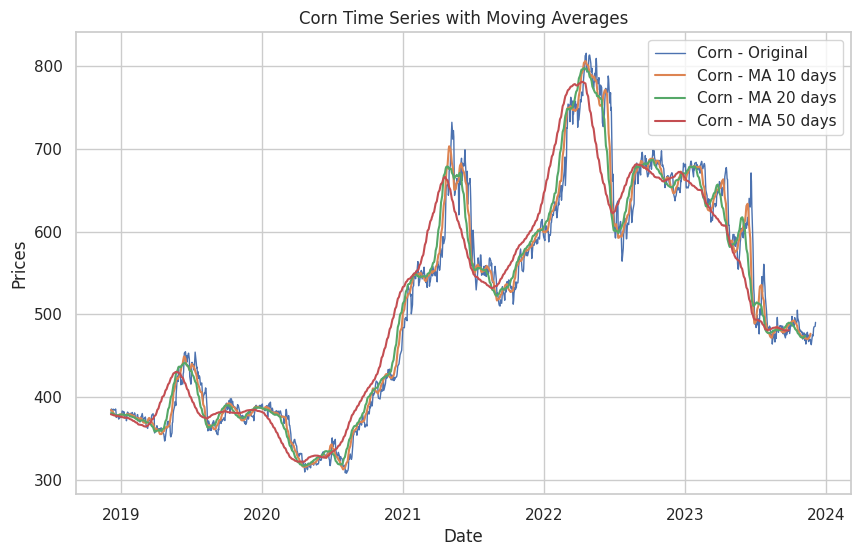

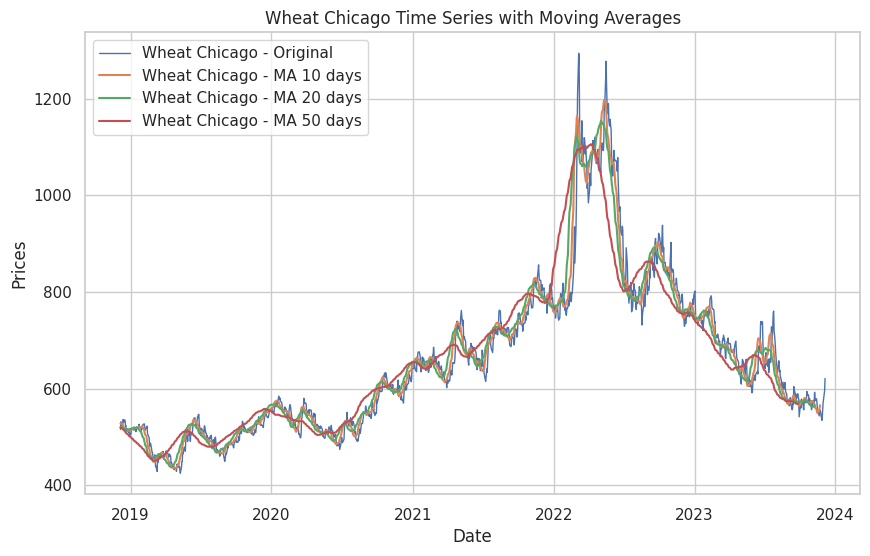

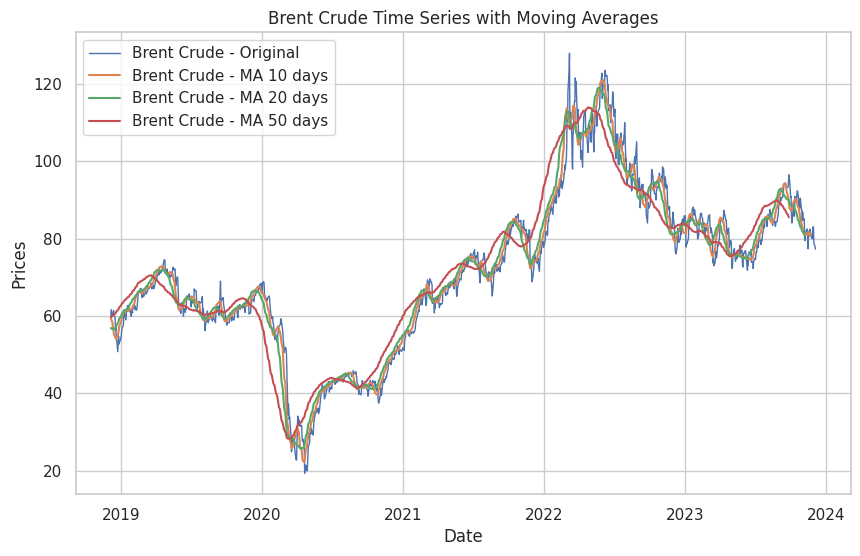

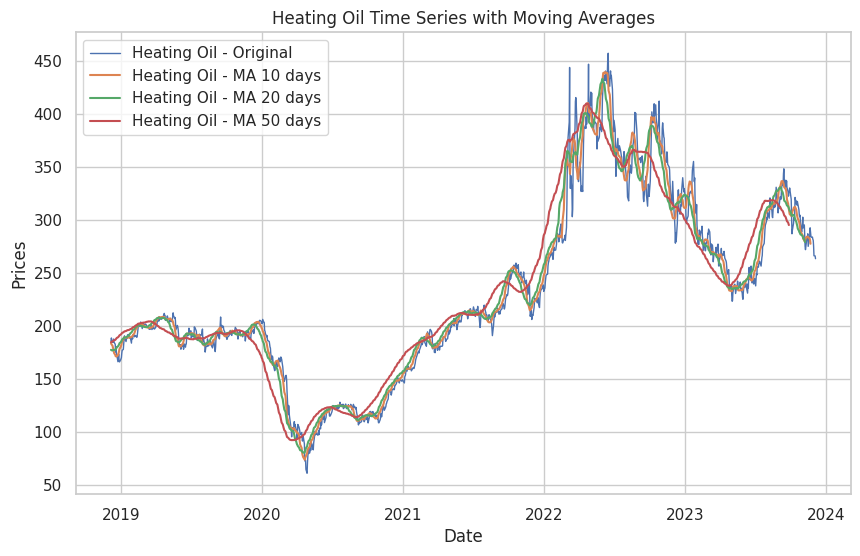

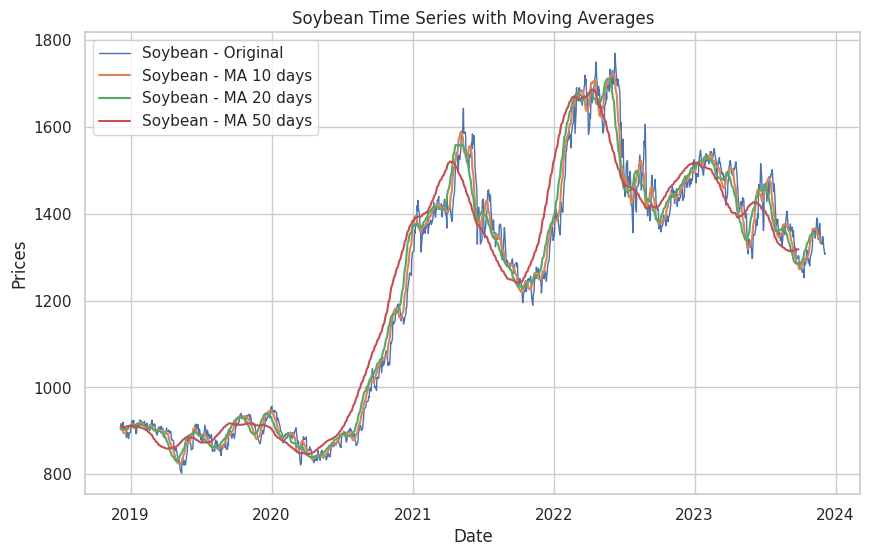

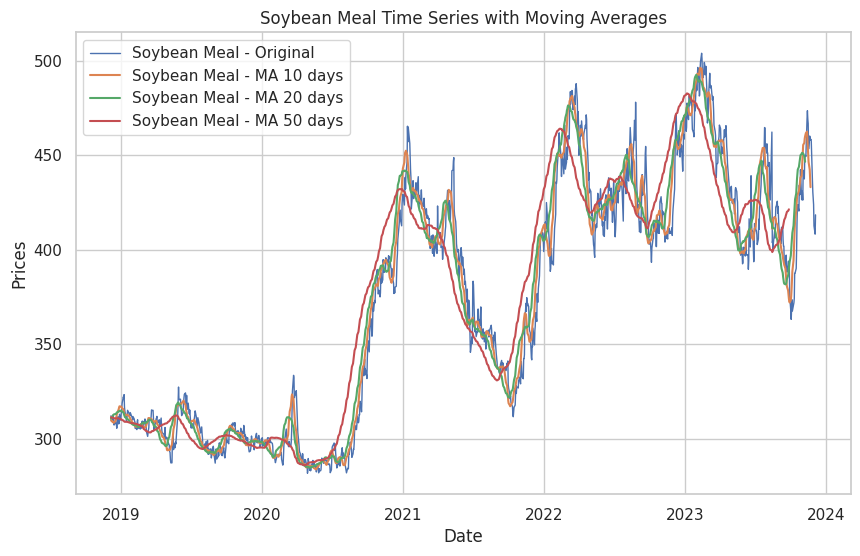

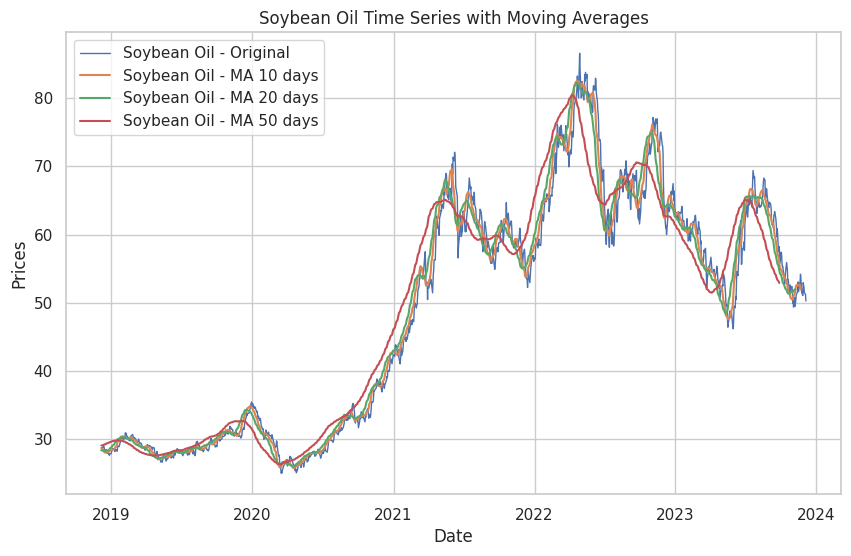

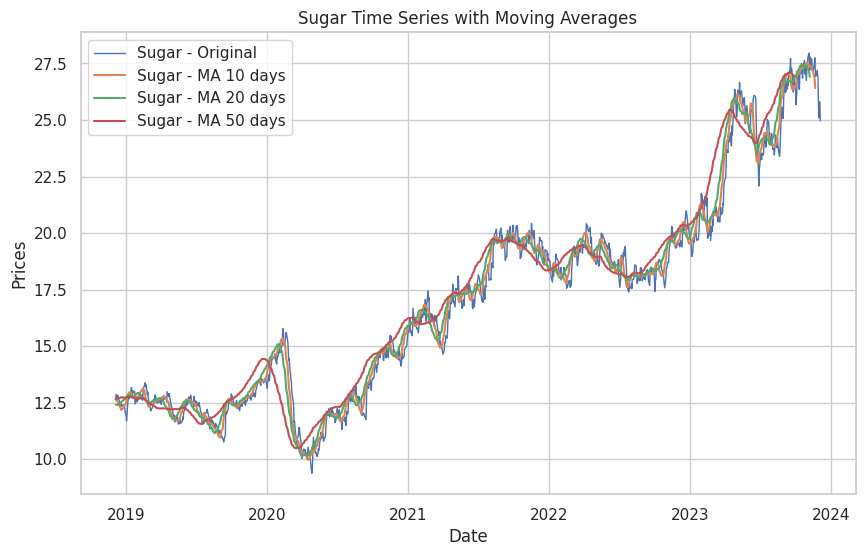

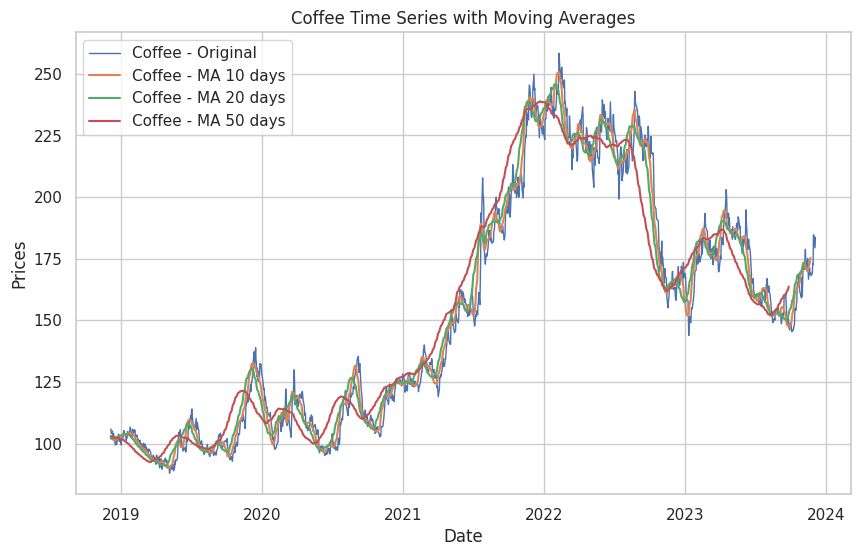

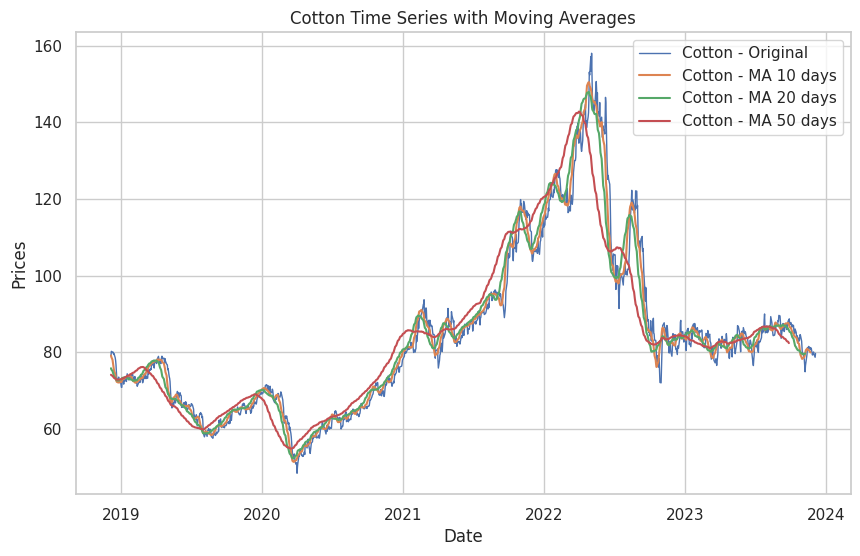

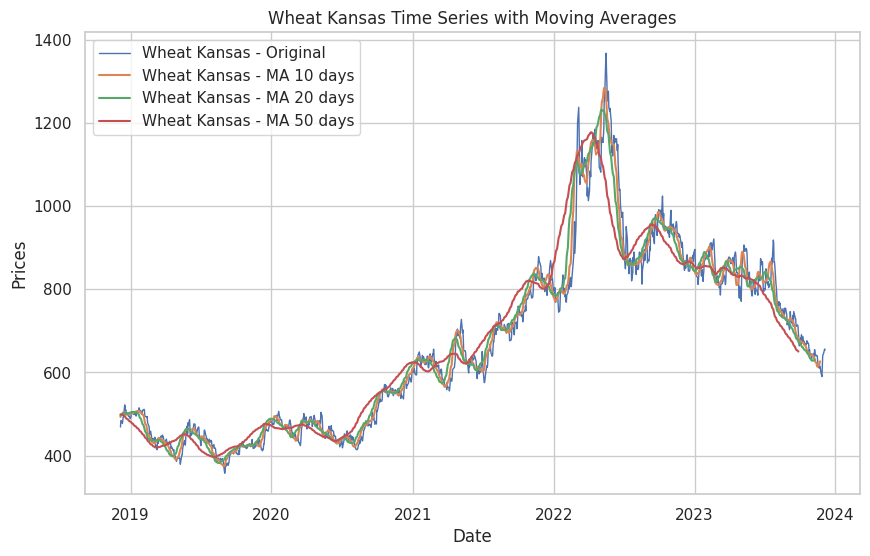

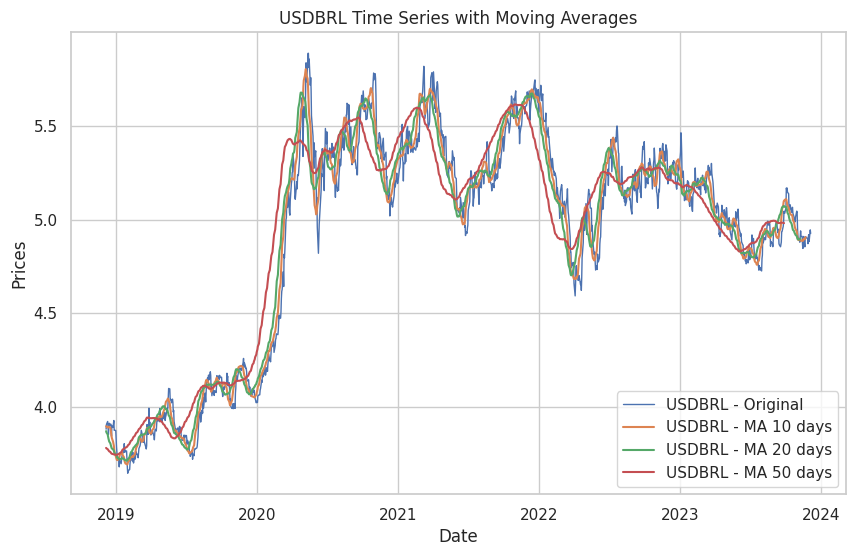

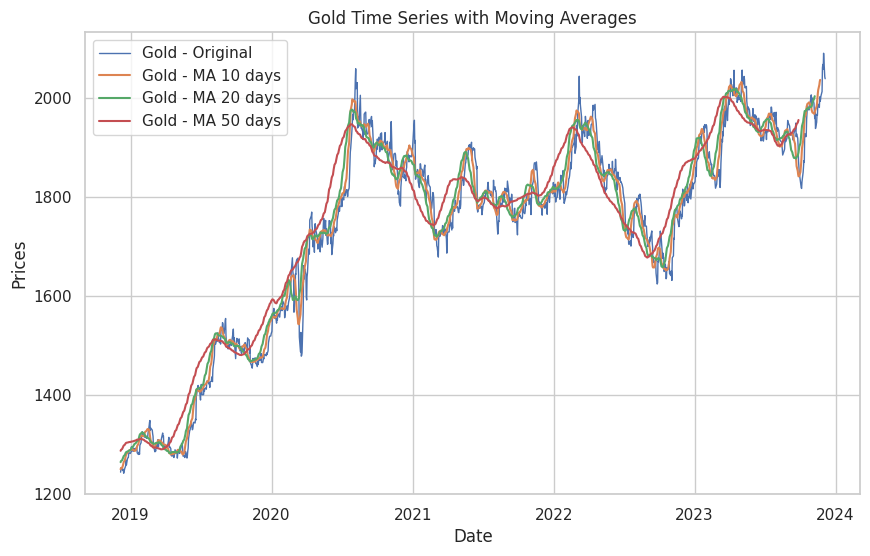

In [ ]:
# Moving Average
ma_days = [10, 20, 50]

# Loop for each column of the DataFrame
for column in prices.columns:
    plt.figure(figsize=(10, 6))

    # Original time series plot
    plt.plot(prices.index, prices[column], label=f'{column} - Original', linewidth=1)

    # Calculates and plots moving averags
    for day in ma_days:
        ma_label = f'{column} - MA {day} days'
        ma_values = prices[column].rolling(window=day).mean()
        plt.plot(prices.index, ma_values, label=ma_label)

    # Add labels and caption
    plt.title(f'{column} Time Series with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()

    # Show the graph
    plt.show()


For the year 2024, moving averages indicate an upward trend in the prices of Soybean, Soybean Meal, Coffee, and Gold. On the flip side, prices are expected to decrease for Feeder Cattle, Live Cattle, Wheat Chicago, Brent Crude, Heating Oil, Soybean Oil, Cotton, and Wheat Kansas. Meanwhile, Corn, Sugar, and USDBRL exhibit relatively low volatility.


<Figure size 1500x2500 with 0 Axes>

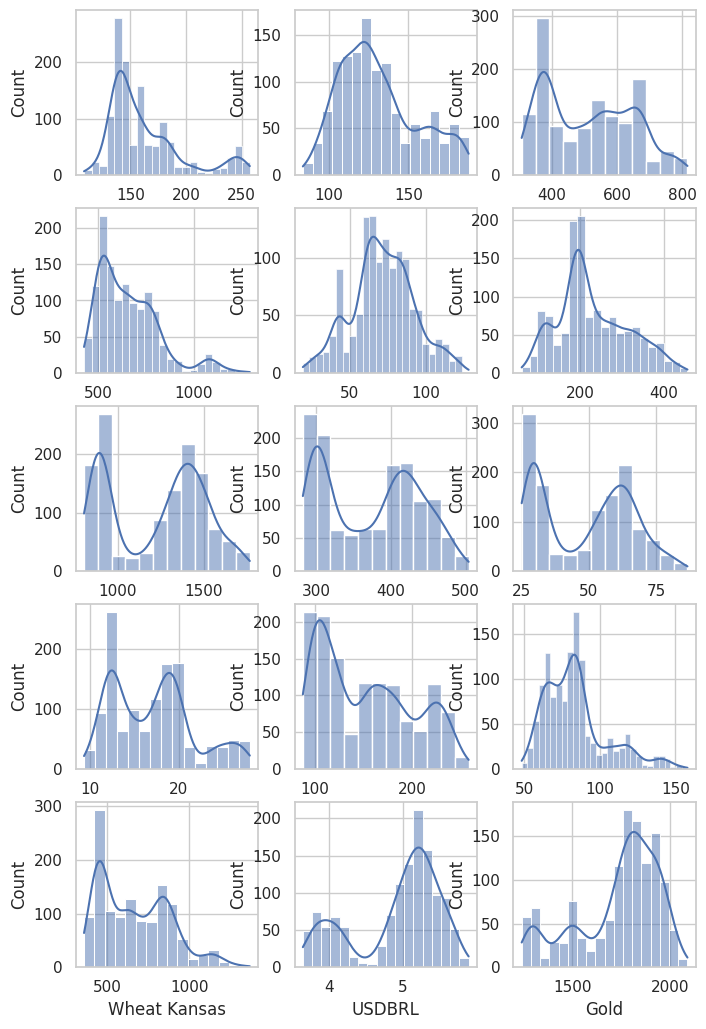

In [ ]:
# Settings for subplots
l = prices.columns.values
number_of_columns = 3
number_of_rows = (len(l) - 1) // number_of_columns + 1
plt.figure(figsize=(15, 5 * number_of_rows))
plt.figure(figsize=(8,15));

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1);
    sns.histplot(df1[l[i]],kde=True);

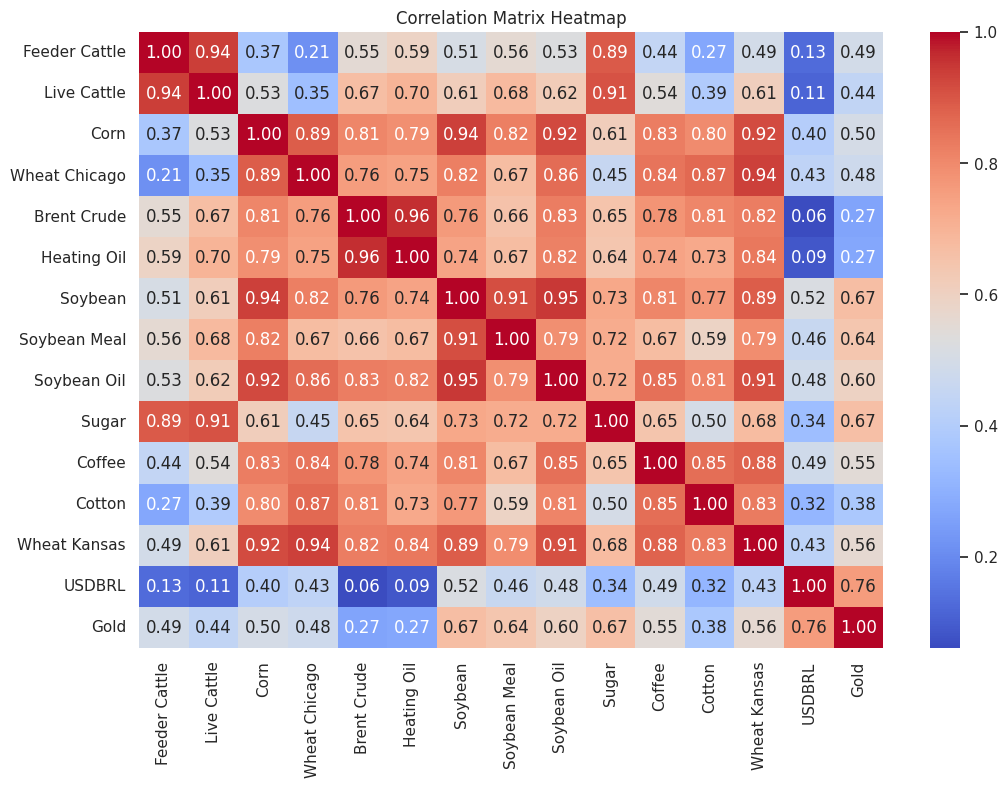

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(prices_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2.2 Returns


In [ ]:
# View the first rows of the DataFrame
returns.head()

Feeder Cattle  Live Cattle      Corn  Wheat Chicago  Brent Crude  \
Date                                                                           
2023-12-05            NaN          NaN       NaN            NaN          NaN   
2023-12-04      -0.017615    -0.009192 -0.009689      -0.040274     0.009313   
2023-12-01       0.018525     0.013168 -0.001545      -0.031473     0.010893   
2023-11-30       0.025767     0.009452 -0.004126      -0.011698     0.050076   
2023-11-29       0.010230     0.005999 -0.014500      -0.024989     0.003260   

            Heating Oil   Soybean  Soybean Meal  Soybean Oil     Sugar  \
Date                                                                     
2023-12-05          NaN       NaN           NaN          NaN       NaN   
2023-12-04     0.009795 -0.001720     -0.024373     0.019499  0.034054   
2023-12-01     0.000677  0.014354      0.010776     0.004098 -0.027896   
2023-11-30     0.034830  0.013396      0.027381     0.015743  0.037864   
2023-11-29     0.019788  0.003165      0.007075     0.007271  0.031490   

              Coffee    Cotton  Wheat Kansas    USDBRL      Gold  
Date                                                              
2023-12-05       NaN       NaN           NaN       NaN       NaN  
2023-12-04 -0.023673 -0.012550      0.003824  0.003918  0.001913  
2023-12-01  0.027592  0.009405     -0.017143 -0.012558  0.023259  
2023-11-30  0.001899  0.008058     -0.002713  0.007516 -0.015552  
2023-11-29 -0.064970 -0.005871     -0.005052 -0.002744  0.004812

In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1295 entries, 2023-12-05 to 2018-12-06
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feeder Cattle  1294 non-null   float64
 1   Live Cattle    1294 non-null   float64
 2   Corn           1294 non-null   float64
 3   Wheat Chicago  1294 non-null   float64
 4   Brent Crude    1294 non-null   float64
 5   Heating Oil    1294 non-null   float64
 6   Soybean        1294 non-null   float64
 7   Soybean Meal   1294 non-null   float64
 8   Soybean Oil    1294 non-null   float64
 9   Sugar          1294 non-null   float64
 10  Coffee         1294 non-null   float64
 11  Cotton         1294 non-null   float64
 12  Wheat Kansas   1294 non-null   float64
 13  USDBRL         1294 non-null   float64
 14  Gold           1294 non-null   float64
dtypes: float64(15)
memory usage: 161.9 KB


In [ ]:
# Descriptive statistics
returns_summary_stats = returns.describe()
returns_correlation_matrix = returns.corr()

In [ ]:
returns.dropna(inplace=True)

In [ ]:
returns_summary_stats

Feeder Cattle  Live Cattle         Corn  Wheat Chicago  Brent Crude  \
count    1294.000000  1294.000000  1294.000000    1294.000000  1294.000000   
mean       -0.000231    -0.000209    -0.000049       0.000065     0.000215   
std         0.012229     0.011640     0.016979       0.020387     0.029122   
min        -0.106658    -0.065677    -0.066750      -0.079497    -0.173681   
25%        -0.005044    -0.005120    -0.008942      -0.010932    -0.013497   
50%         0.000000     0.000000     0.000000       0.000000    -0.002360   
75%         0.005276     0.004161     0.007941       0.012043     0.010989   
max         0.084577     0.086718     0.140170       0.105336     0.322814   

       Heating Oil      Soybean  Soybean Meal  Soybean Oil        Sugar  \
count  1294.000000  1294.000000   1294.000000  1294.000000  1294.000000   
mean      0.000119    -0.000192     -0.000104    -0.000270    -0.000393   
std       0.028210     0.013412      0.015683     0.018081     0.016262   
min      -0.141249    -0.063112     -0.071788    -0.064844    -0.083471   
25%      -0.013712    -0.007275     -0.008194    -0.011833    -0.010855   
50%      -0.000971    -0.000563      0.000000     0.000000     0.000000   
75%       0.011913     0.006843      0.008402     0.010017     0.009584   
max       0.280865     0.116501      0.144874     0.097225     0.081437   

            Coffee       Cotton  Wheat Kansas       USDBRL         Gold  
count  1294.000000  1294.000000   1294.000000  1294.000000  1294.000000  
mean     -0.000198     0.000150     -0.000046    -0.000132    -0.000334  
std       0.021301     0.017687      0.020525     0.010238     0.009781  
min      -0.091144    -0.051862     -0.074675    -0.036279    -0.056118  
25%      -0.014128    -0.009436     -0.011173    -0.006057    -0.005480  
50%       0.000000     0.000000      0.000000    -0.000125    -0.000322  
75%       0.013290     0.009005      0.012593     0.006113     0.004093  
max       0.094403     0.119031      0.085988     0.047749     0.052470

In [ ]:
returns.loc['2023-01-01':'2023-12-31'].std()

<ipython-input-98-da0945d68053>:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Feeder Cattle    0.011727
Live Cattle      0.008378
Corn             0.018112
Wheat Chicago    0.021616
Brent Crude      0.019972
Heating Oil      0.022519
Soybean          0.012732
Soybean Meal     0.018975
Soybean Oil      0.019696
Sugar            0.016801
Coffee           0.019955
Cotton           0.016460
Wheat Kansas     0.019718
USDBRL           0.007483
Gold             0.008267
dtype: float64


In finance, an asset's risk is tied to the standard deviation of its returns; hence, the assets with the highest standard deviations are generally considered the riskiest. The overall riskiest assets include Brent Crude, Heating Oil, Coffee, Wheat Kansas, and Wheat Chicago.

Specifically for the year 2023, the assets with the highest risk are Heating Oil, Wheat Chicago, Brent Crude, Coffee, and Wheat Kansas.



In [ ]:
# Visualizing Time Series with Plotly Express
fig = px.line(returns, y=['Feeder Cattle', 'Live Cattle', 'Corn', 'Wheat Chicago',	'Brent Crude', 'Heating Oil',	'Soybean',	'Soybean Meal',	'Soybean Oil',	'Sugar',	'Coffee',	'Cotton',	'Wheat Kansas',	'USDBRL',	'Gold'],
              labels={'value': 'Prices', 'variable': 'Assets'},
              title='Returns time series')
fig.show()

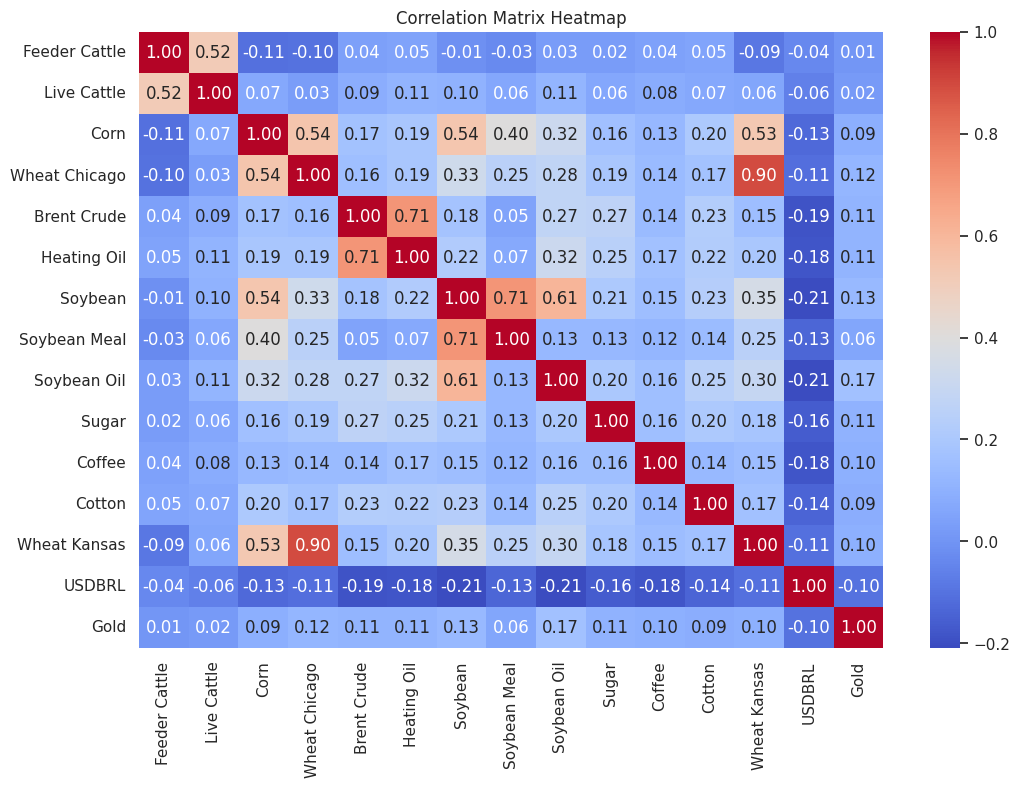

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(returns_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


The Returns Correlation Matrix Heatmap indicates a stronger correlation among stocks within the same sector than with others. For instance, within the energy sector, there is a significant correlation between Brent Crude and Heating Oil, and among Grain Cereals, correlations are notable with Wheat Chicago, Wheat Kansas, Corn, and Soybeans. Another noteworthy relationship exists among soybean derivatives.

# Testing Normal Distribution

The graphs below depict the histograms of each stock alongside their normal distribution curves.

Subsequently, Shapiro-Wilk and Quantile-Quantile Tests (QQ Plot) are conducted to assess whether the distribution is normal.

Normality tests are statistical procedures used to assess whether a data sample follows a normal distribution, indicating approximate symmetry around the mean. The normal distribution, or Gaussian distribution, is fundamental in various statistical techniques, and many methods assume data to be normally distributed.

Two common tests mentioned are the Shapiro-Wilk test and Quantile-Quantile Test (QQ Plot).

Shapiro-Wilk Test: This assesses whether a data sample follows a normal distribution, providing a test statistic and p-value. A low p-value suggests non-normality.

Quantile-Quantile Test (QQ Plot): This compares theoretical quantiles of a normal distribution with empirical quantiles of observed data. Proximity to a diagonal line suggests potential normality.

These tests are vital in statistics and data analysis, especially when applying methods assuming normality. However, real-world datasets may deviate from normality

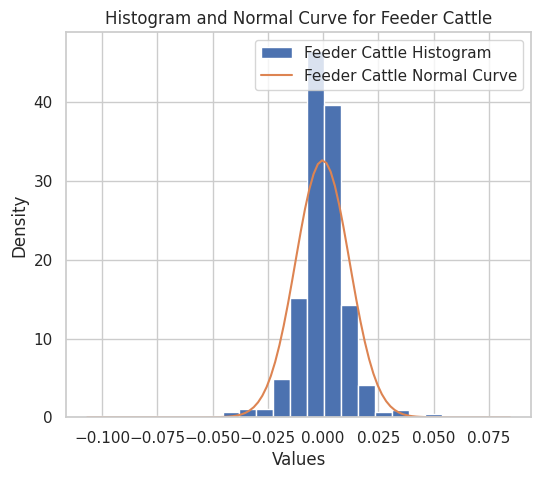

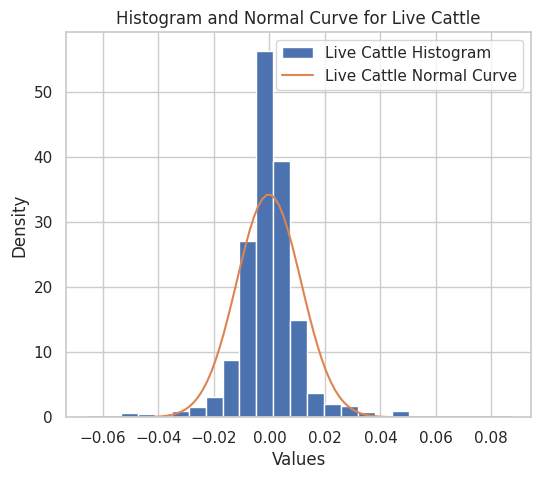

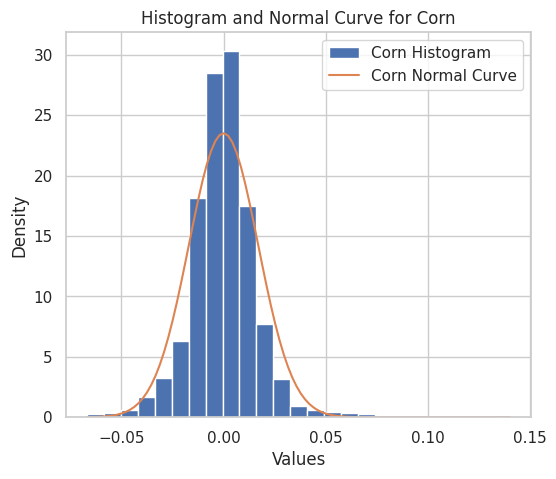

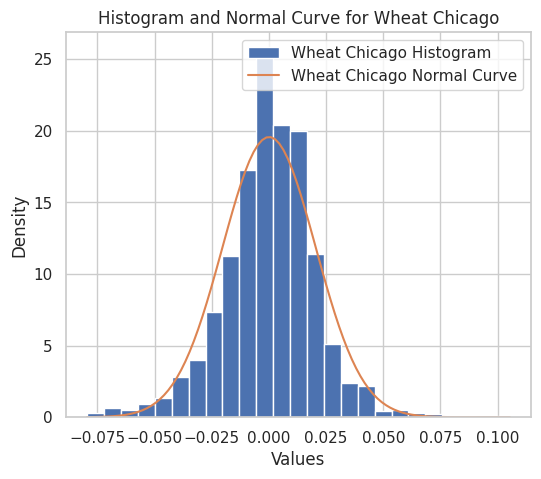

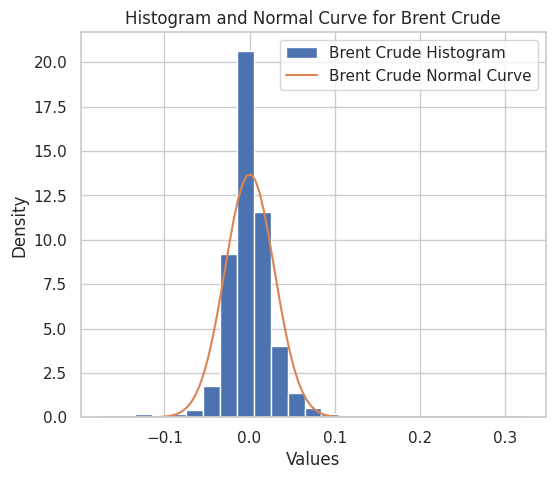

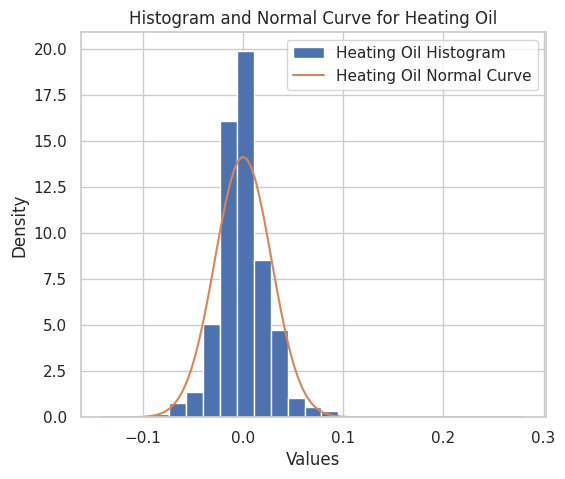

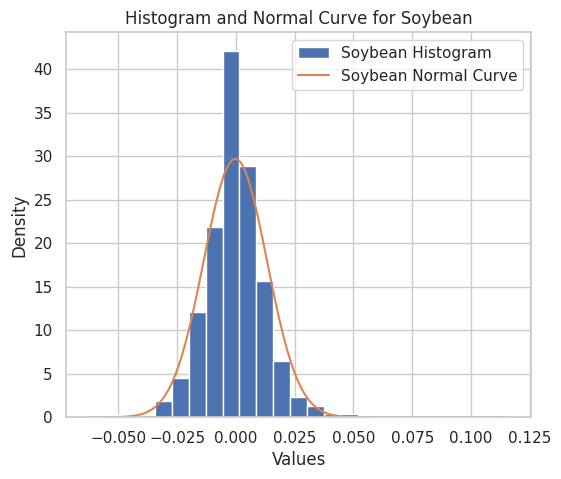

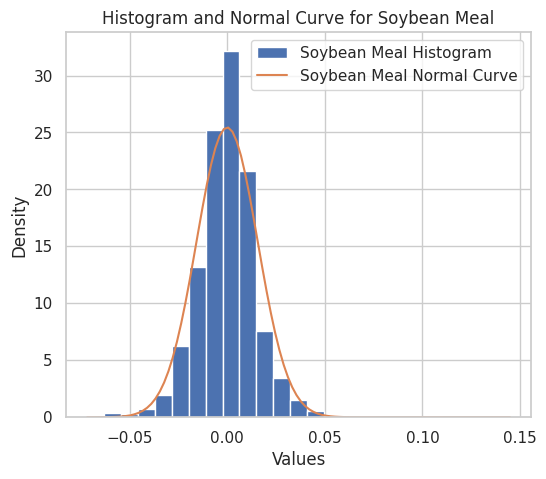

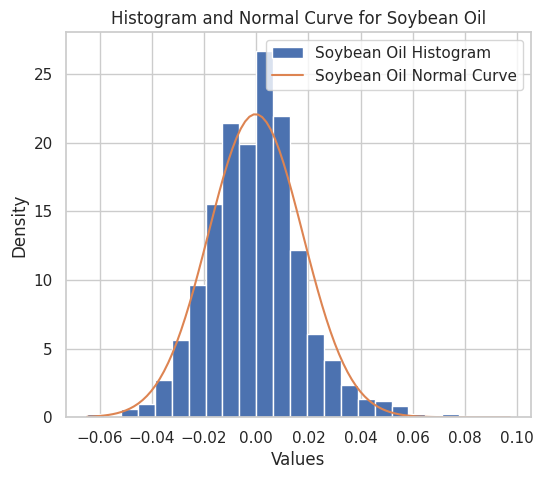

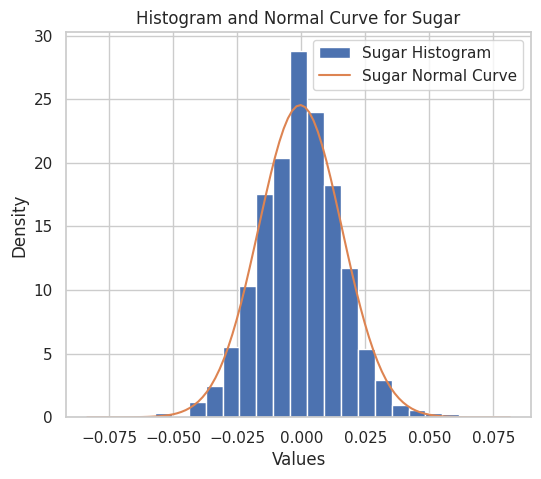

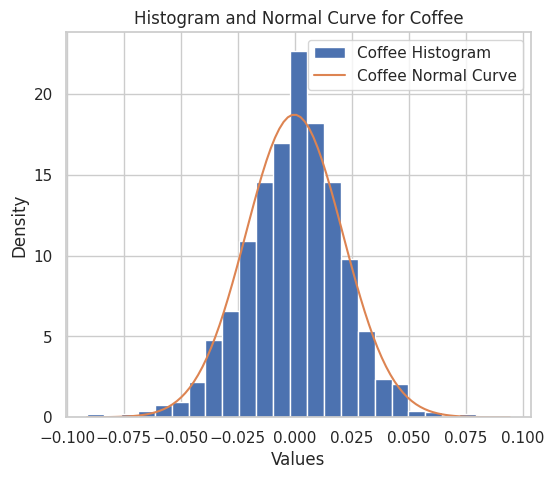

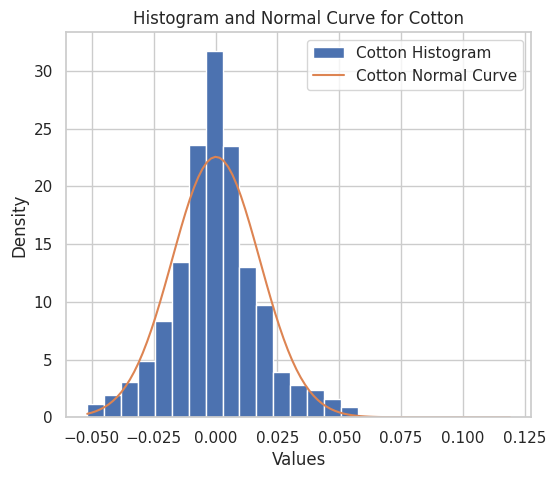

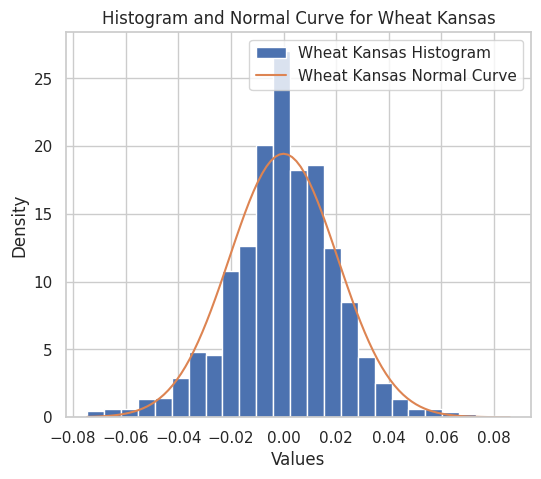

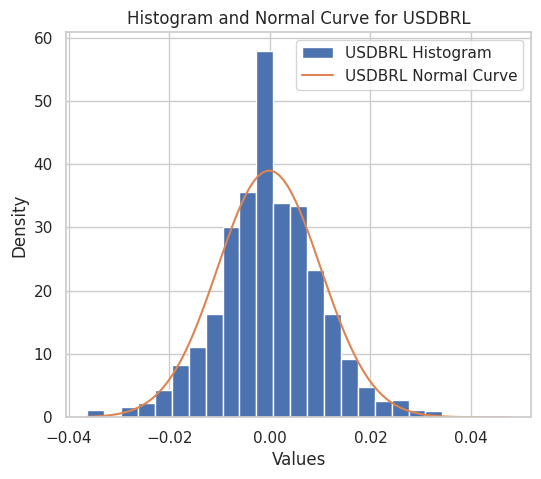

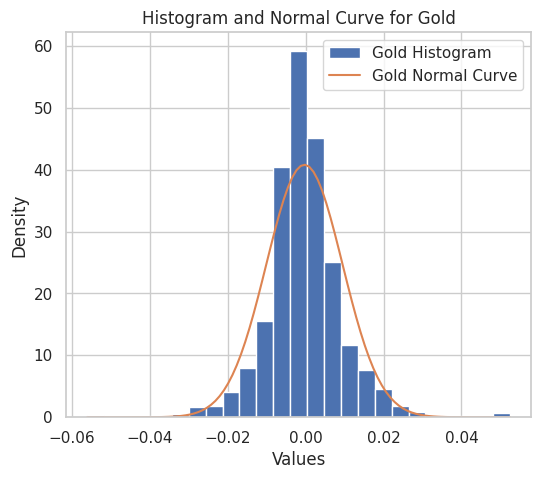

In [ ]:
for column in returns.columns:
    # Extract column values
    values = returns[column].dropna().values

    # Calculates descriptive statistics
    mini = min(values)
    maxi = max(values)
    mean = np.mean(values)
    std = np.std(values)

    # plot the histogram
    plt.figure(figsize=(6,5))
    plt.hist(values, bins=25, edgecolor='w', density=True, label=f'{column} Histogram')

    # Add the normal curve
    data = np.linspace(mini, maxi, 100)
    plt.plot(data, norm.pdf(data, mean, std), label=f'{column} Normal Curve')

    # Add labels and caption
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Histogram and Normal Curve for {column}')
    plt.legend()

    # Show the graph
    plt.show()


In [ ]:
for column in returns.columns:
    stat1, p = shapiro(returns[column])
    print(column)
    print("Statistics=%.3f, p_value%.3f" % (stat1, p))
    if p > 0.05:
      print('Data is Normally distributed')
    else:
      print('Data is not Normally distributed')

Feeder Cattle
Statistics=0.865, p_value0.000
Data is not Normally distributed
Live Cattle
Statistics=0.870, p_value0.000
Data is not Normally distributed
Corn
Statistics=0.916, p_value0.000
Data is not Normally distributed
Wheat Chicago
Statistics=0.974, p_value0.000
Data is not Normally distributed
Brent Crude
Statistics=0.828, p_value0.000
Data is not Normally distributed
Heating Oil
Statistics=0.878, p_value0.000
Data is not Normally distributed
Soybean
Statistics=0.938, p_value0.000
Data is not Normally distributed
Soybean Meal
Statistics=0.942, p_value0.000
Data is not Normally distributed
Soybean Oil
Statistics=0.980, p_value0.000
Data is not Normally distributed
Sugar
Statistics=0.990, p_value0.000
Data is not Normally distributed
Coffee
Statistics=0.993, p_value0.000
Data is not Normally distributed
Cotton
Statistics=0.976, p_value0.000
Data is not Normally distributed
Wheat Kansas
Statistics=0.985, p_value0.000
Data is not Normally distributed
USDBRL
Statistics=0.989, p_value0

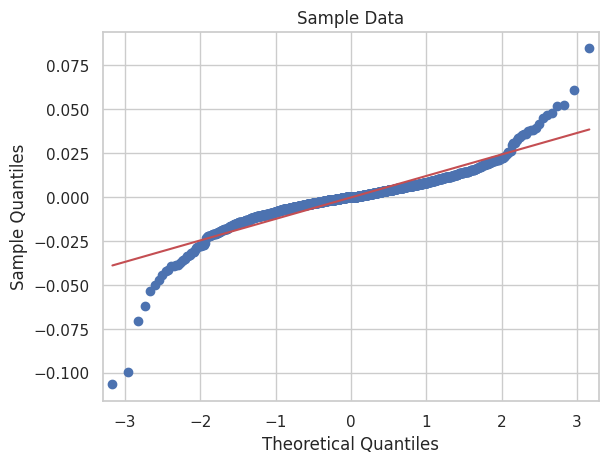

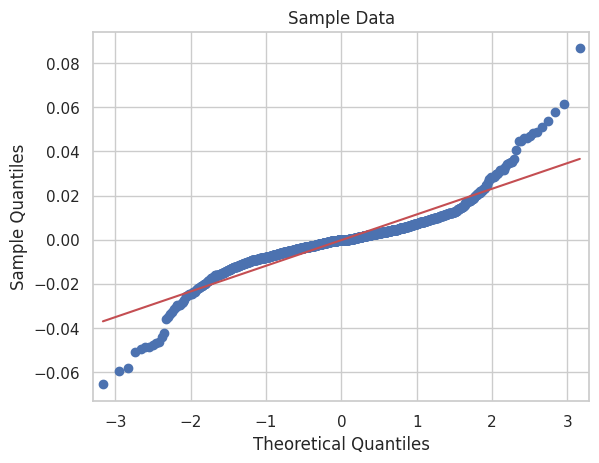

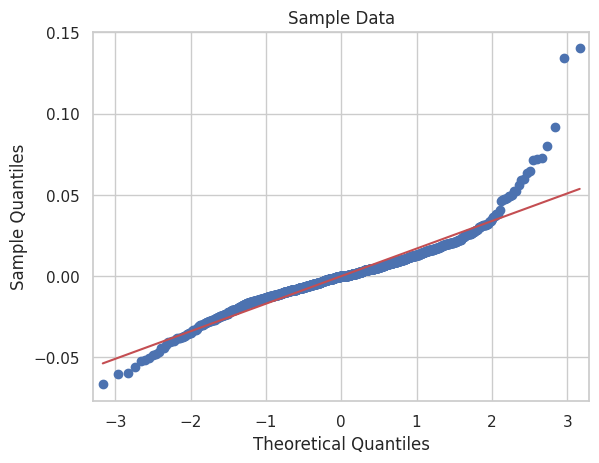

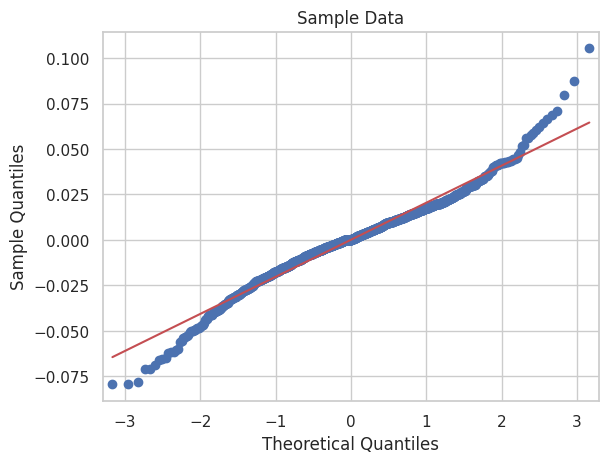

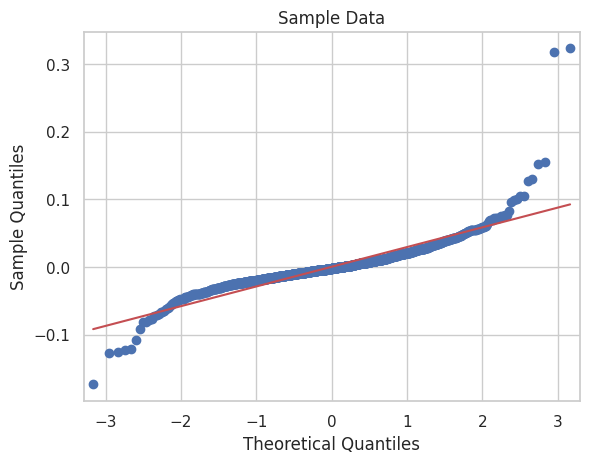

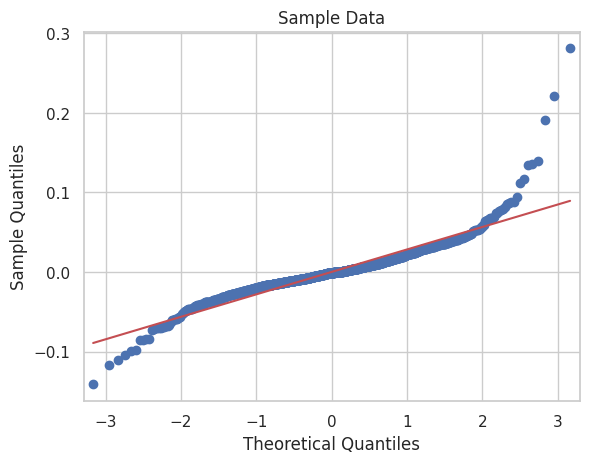

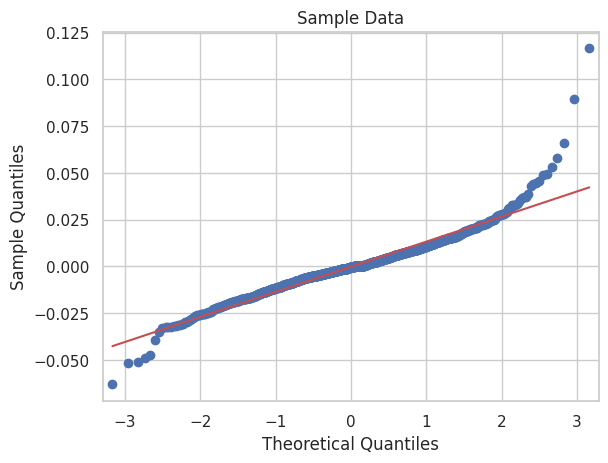

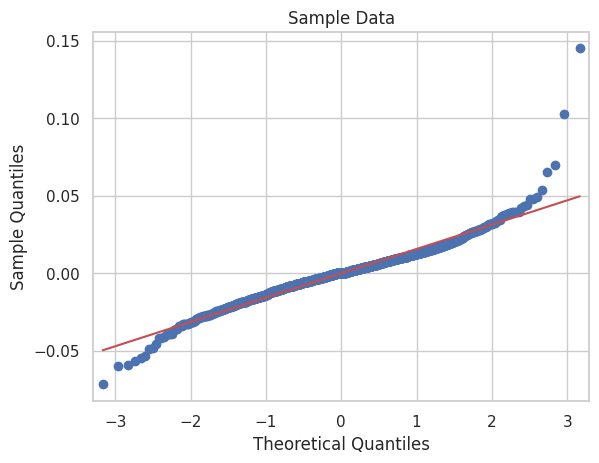

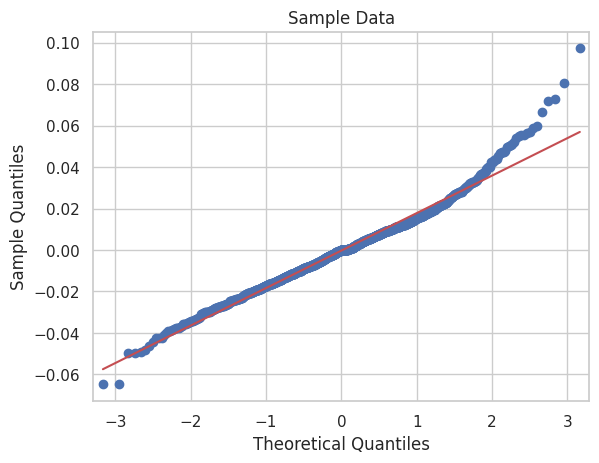

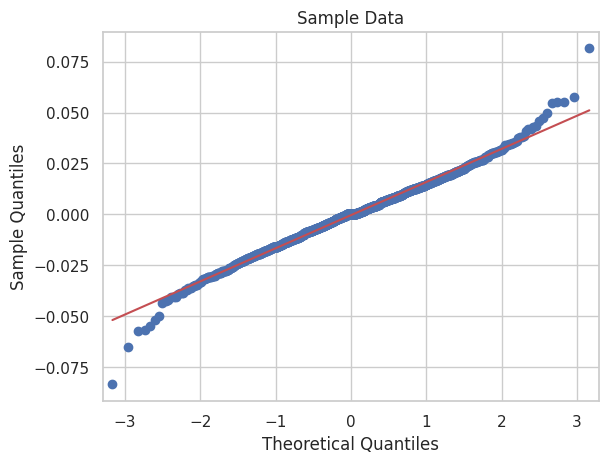

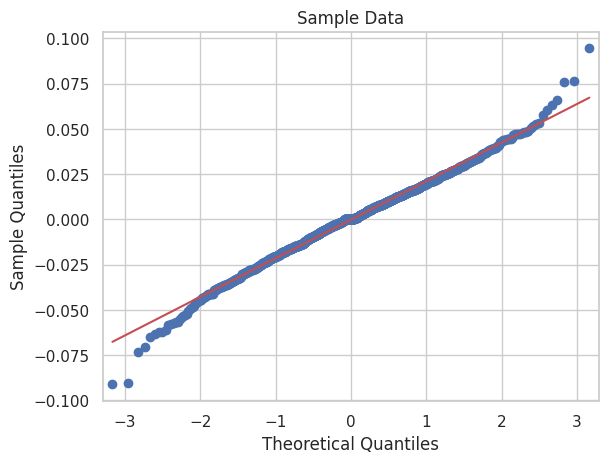

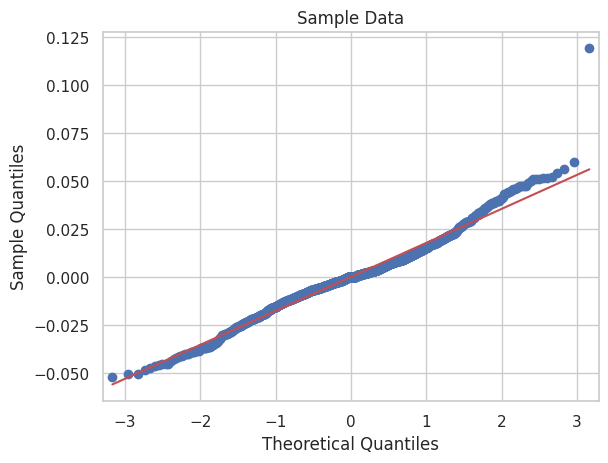

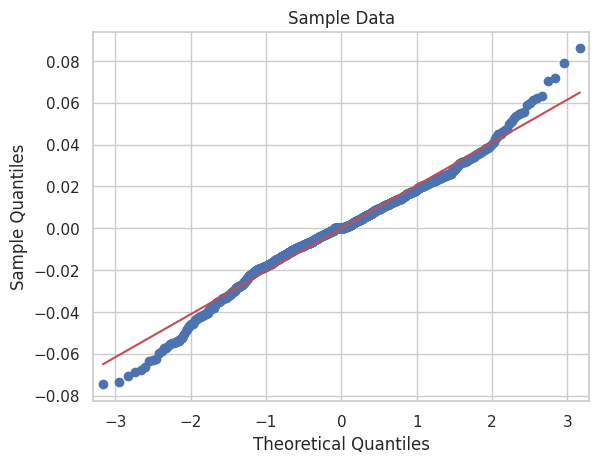

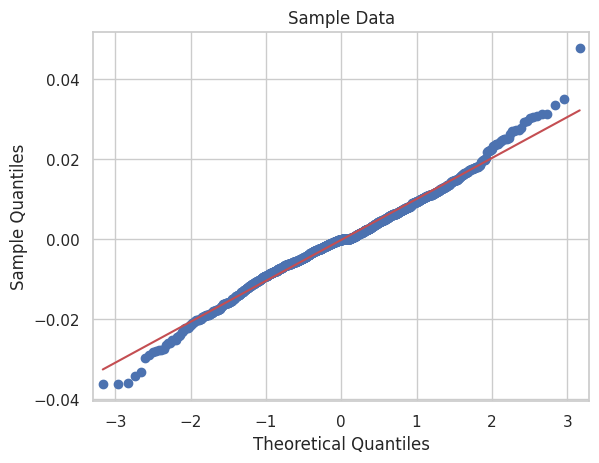

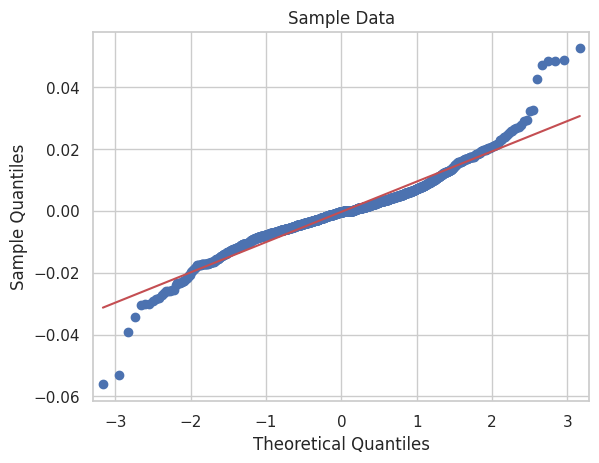

In [ ]:
for column in returns.columns:
  sm.qqplot(returns[column], line='s')
  plt.title('Sample Data')

None of the stocks passed the normal distribution test. This indicates that the data does not exhibit a symmetrical pattern around the mean, as expected in a normal distribution. The departure from normality suggests that assumptions relying on a normal distribution may not be appropriate for these stocks.

## Conclusion

The role of a hedge is to buy and sell futures contracts to eliminate risks associated with the random evolution of prices. Therefore, it is advisable to invest in stocks that tend to rise, such as Soybean, Soybean Meal, Coffee, and Gold. Additionally, it is crucial to assess the correlations of these assets with others.

Another noteworthy point is to evaluate assets with high volatility, as this risk can be mitigated through the purchase or sale of a futures contract. This strategic consideration adds a layer of risk management to the investment portfolio, enhancing the overall resilience and potential for favorable returns.

## References

[1] https://towardsdatascience.com/understanding-investment-risk-3882c58e00e0

[2] https://towardsdatascience.com/are-stock-returns-normally-distributed-c602ad3dd498

[3]GEMAN, Hélyette. Agricultural finance: from crops to land, water and infrastructure. John Wiley & Sons, 2014.

[4] HILPISCH, Yves. Python for finance: mastering data-driven finance. O'Reilly Media, 2018.